In [51]:
%%latex
$error、squared\_error、mean\_squared\_error、bias、variance、noise之间的关系\\
error:|\hat y-y|\\
squared\_error:(\hat y-y)^2\\
mean\_squared\_error:\\
E((\hat y-y)^2)=E((\hat y-h(x)+h(x)-y)^2)=E((\hat y-h(x))^2)+E((h(x)-y)^2)\\
用来衡量所有模型估计值与真值之间的差距均值\\
其中:E((\hat y-h(x))^2)=E((\hat y-\bar{\hat y}+\bar{\hat y}-h(x))^2)
=E((\hat y-\bar{\hat y})^2)+E((\bar{\hat y}-h(x))^2)\\
用来衡量所有模型估计值与最优模型估计值之间的差距均值\\
bias^2:E((\bar{\hat y}-h(x))^2)\\
用来衡量所有模型估计值均值与最优模型估计值之间的差距均值\\
variance:E((\hat y-\bar{\hat y})^2)\\
用来衡量单个模型估计值与所有模型估计值均值之间的差距均值\\
noise:E((h(x)-y)^2)\\
用来衡量最优模型估计值与真值之间的差距均值，由数据本身导致，不可避免。\\
公式:mean\_squared\_error=bias^2+variance+noise\\
注:\\
y代表真值，\hat y代表单个模型的估计值，\bar{\hat y}代表所有模型估计值均值\\
h(x)代表最优模型估计值。\\
y\_noise = np.var(y\_test, axis=1)\\
y\_bias = (f(X\_test) - np.mean(y\_predict, axis=1)) ** 2\\
y\_var = np.var(y\_predict, axis=1)$

<IPython.core.display.Latex object>

In [156]:
#导入数据
import numpy as np
np.random.seed(0)
noise = 0.05
n_repeat = 50
n_train = 50
n_test = 1000
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)
def generate(n_samples,noise):
    X = np.random.rand(n_samples)*10-5
    X = np.sort(X)
    y = f(X)+np.random.normal(0.0,noise,n_samples)
    X = X.reshape((n_samples,1))
    return X,y
X_train = []
y_train = []
for i in range(n_repeat):
    X,y = generate(n_train,noise)
    X_train.append(X)
    y_train.append(y)
X_test,y_test = generate(n_test,noise)

single tree: 0.0076 (error) = 0.0048 (bias^2)  + 0.0000 (var) + 0.0024 (noise)
bagging tree: 0.0087 (error) = 0.0004 (bias^2)  + 0.0057 (var) + 0.0024 (noise)


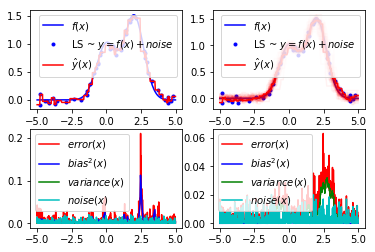

In [157]:
#构建模型
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
estimators = [('single tree',DecisionTreeRegressor()),
              ('bagging tree',BaggingRegressor())]
n_estimators = len(estimators)
for index,(name,estimator) in enumerate(estimators):
    if name == 'single tree':
        estimator.fit(X_train[0],y_train[0])
        y_predict = estimator.predict(X_test)
        y_error = (y_predict-y_test)**2
        y_bias = (y_predict-f(X_test))**2
        y_var = np.zeros(n_test)
        y_noise = (f(X_test)-y_test)**2
    else:
        y_predict = np.zeros((n_test,n_repeat))
        for i in range(n_repeat):
            estimator.fit(X_train[i],y_train[i])
            y_predict[:,i] = estimator.predict(X_test)
        for i in range(n_repeat):
            y_error += (y_test-y_predict[:,i])**2
        y_error /= n_repeat
        y_bias = (np.mean(y_predict,axis = 1)-f(X_test))**2
        y_var = np.var(y_predict,axis = 1)
        y_noise = (f(X_test)-y_test)**2
    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))
    plt.subplot(2, n_estimators, index + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")
    if name == 'single tree':
        plt.plot(X_test,y_predict,'r',label = '$\^y(x)$')
    else:
        for i in range(n_repeat):
            if i == 0:
                plt.plot(X_test, y_predict[:, i], "r", label="$\^y(x)$")
            else:
                plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)
    plt.legend()
    plt.subplot(2, n_estimators, n_estimators + index + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")
    plt.legend()

In [158]:
#问题
#一、为什么源代码中y_test是二维数组？
#二、为什么我的代码中检验集不满足公式mean_squared_error=bias**2+variance+noise